In [1]:
import pandas as pd
df=pd.read_csv("/kaggle/input/elderly-fall-prediction-and-detection-cstick/cStick.csv")

In [2]:
df

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


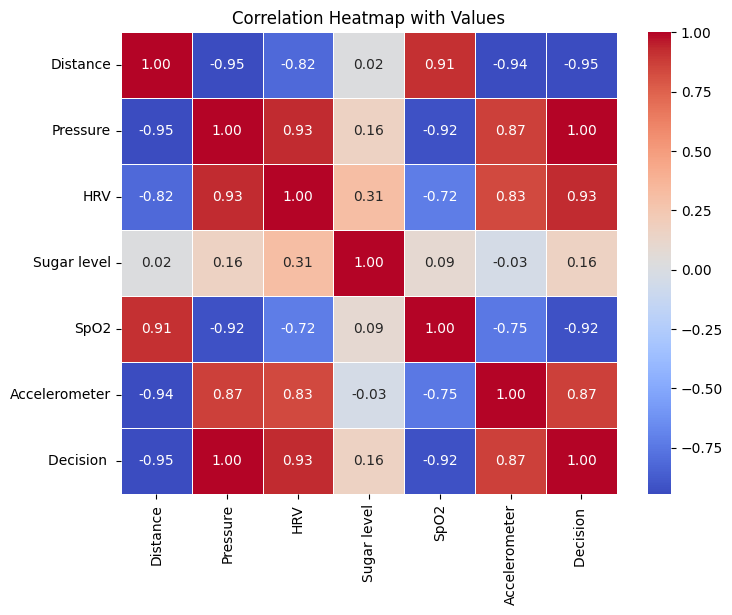

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with correlation values displayed
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Values")
plt.show()

In [8]:
df.columns

Index(['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer',
       'Decision '],
      dtype='object')

In [9]:
X=df.drop('Decision ',axis=1)
y=df['Decision ']

In [10]:
# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Create a mask to identify highly correlated features
mask = (corr_matrix >= 0.4) & (corr_matrix < 1.0)

# Drop highly correlated columns
columns_to_drop = set()
for col in range(len(mask.columns)):
    for row in range(col):
        if mask.iloc[row, col]:
            colname = mask.columns[col]
            columns_to_drop.add(colname)
X= X.drop(columns=columns_to_drop)

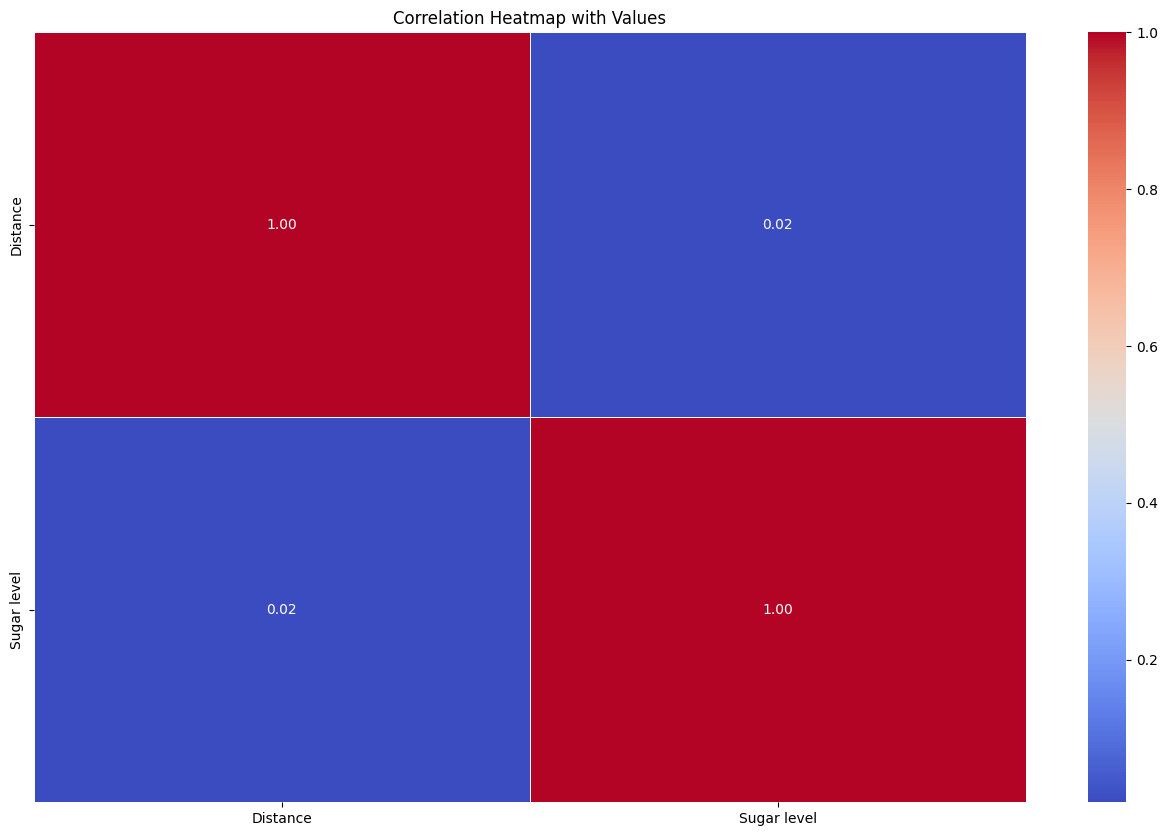

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap with correlation values displayed
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Values")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary (testing + validation) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary data into testing and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data to balance the class distribution
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [16]:
import numpy as np

# Calculate the mode of y_train
y_mode = y_train.mode()[0]

# Create an array y_base filled with the mode value to match the shape of y_train
y_base = np.full(y_train.shape, y_mode)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_train, y_base)

0.3333333333333333

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression()

In [21]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_train_preds = log_reg.predict(X_train)

In [23]:
accuracy_score(y_train, y_train_preds)

1.0

<Axes: >

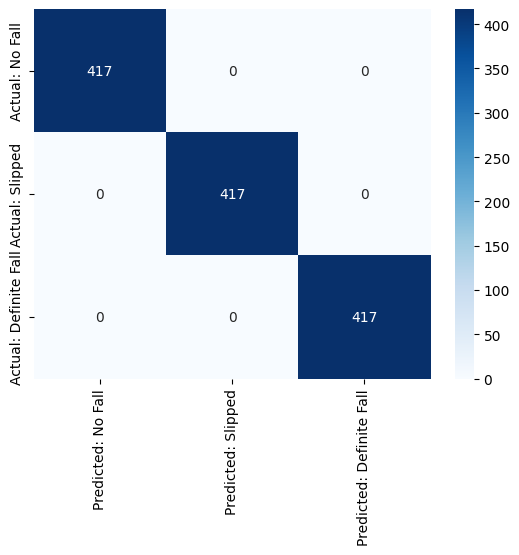

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['No Fall', 'Slipped','Definite Fall']

# Compute the confusion matrix using the predicted labels and the true labels
cm = confusion_matrix(y_train, y_train_preds)

# Generate a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: ' + label for label in class_labels],
            yticklabels=['Actual: ' + label for label in class_labels])

In [27]:
y_val_preds = log_reg.predict(X_val)
accuracy_score(y_val, y_val_preds)

1.0

<Axes: >

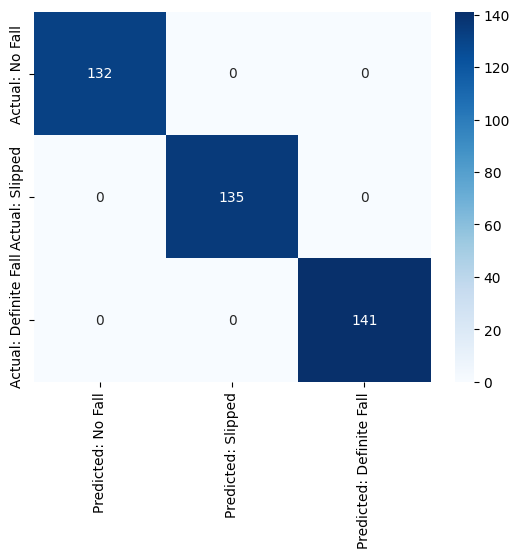

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['No Fall', 'Slipped','Definite Fall']

# Compute the confusion matrix using the predicted labels and the true labels
cm = confusion_matrix(y_val, y_val_preds)

# Generate a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: ' + label for label in class_labels],
            yticklabels=['Actual: ' + label for label in class_labels])

In [29]:
y_test_preds = log_reg.predict(X_test)
accuracy_score(y_test, y_test_preds)

1.0

<Axes: >

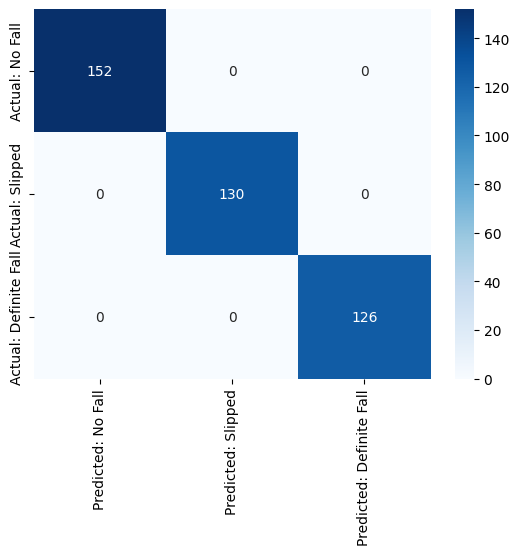

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['No Fall', 'Slipped','Definite Fall']

# Compute the confusion matrix using the predicted labels and the true labels
cm = confusion_matrix(y_test, y_test_preds)

# Generate a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: ' + label for label in class_labels],
            yticklabels=['Actual: ' + label for label in class_labels])

In [31]:
from sklearn.metrics import precision_recall_fscore_support

train_scores = precision_recall_fscore_support(y_train, y_train_preds, average='weighted')
val_scores = precision_recall_fscore_support(y_val, y_val_preds, average='weighted')
test_scores = precision_recall_fscore_support(y_test, y_test_preds, average='weighted')

print("Training set scores (precision, recall, F1 score):", train_scores[:3])
print("Validation set scores (precision, recall, F1 score):", val_scores[:3])
print("Testing set scores (precision, recall, F1 score):", test_scores[:3])

Training set scores (precision, recall, F1 score): (1.0, 1.0, 1.0)
Validation set scores (precision, recall, F1 score): (1.0, 1.0, 1.0)
Testing set scores (precision, recall, F1 score): (1.0, 1.0, 1.0)


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

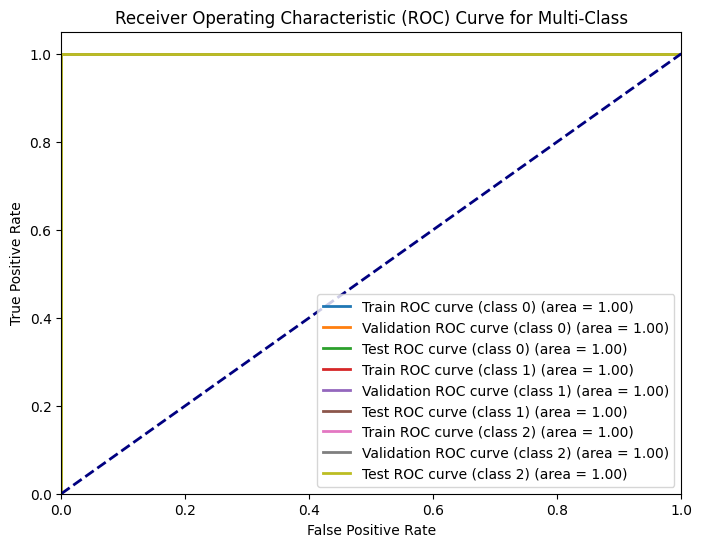

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming y_train, y_val, and y_test are the true labels for each class
# and log_reg.predict_proba returns class probabilities
n_classes = 3

# Binarize the output for multi-class classification (one-vs-rest)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class
y_train_pred_prob = log_reg.predict_proba(X_train)
y_val_pred_prob = log_reg.predict_proba(X_val)
y_test_pred_prob = log_reg.predict_proba(X_test)

# Initialize lists to store ROC data
fpr_train = {}
tpr_train = {}
roc_auc_train = {}
fpr_val = {}
tpr_val = {}
roc_auc_val = {}
fpr_test = {}
tpr_test = {}
roc_auc_test = {}

# Compute ROC curve and ROC AUC for each class in training, validation, and test sets
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_prob[:, i])
    roc_auc_train[i] = roc_auc_score(y_train_bin[:, i], y_train_pred_prob[:, i])

    fpr_val[i], tpr_val[i], _ = roc_curve(y_val_bin[:, i], y_val_pred_prob[:, i])
    roc_auc_val[i] = roc_auc_score(y_val_bin[:, i], y_val_pred_prob[:, i])

    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_prob[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_bin[:, i], y_test_pred_prob[:, i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr_train[i], tpr_train[i], lw=2, label=f'Train ROC curve (class {i}) (area = {roc_auc_train[i]:.2f})')
    plt.plot(fpr_val[i], tpr_val[i], lw=2, label=f'Validation ROC curve (class {i}) (area = {roc_auc_val[i]:.2f})')
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label=f'Test ROC curve (class {i}) (area = {roc_auc_test[i]:.2f})')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [44]:
import altair as alt
import pandas as pd

# Extract the coefficients for each class
coefficients = log_reg.coef_  # Shape will be (n_classes, n_features)
features = X.columns  # Get feature names from X_train

# Number of classes
n_classes = coefficients.shape[0]

# Reshape the coefficients into a long format DataFrame
data = []
for i in range(n_classes):
    for j, feature in enumerate(features):
        data.append({'Class': f'Class {i}', 'Feature': feature, 'Coefficient': coefficients[i, j]})

coefficent_df = pd.DataFrame(data)

In [45]:
coefficent_df

,Class,Feature,Coefficient
0,Class 0,Distance,7.297632
1,Class 0,Sugar level,0.832762
2,Class 1,Distance,1.586113
3,Class 1,Sugar level,-1.140209
4,Class 2,Distance,-8.883745
5,Class 2,Sugar level,0.307447


In [47]:
import plotly.express as px
import pandas as pd

# Create the Plotly bar chart
fig = px.bar(coefficent_df, 
             x='Class', 
             y='Coefficient', 
             color='Feature', 
             facet_col='Feature', 
             title='Coefficients by Class and Feature')

# Show the figure
fig.show()
